In [118]:
# 데이터 전처리 및 분석에 필요한 패키지 로드
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fonm
from matplotlib import font_manager, rc
mpl.rcParams['axes.unicode_minus'] = False
font_path = 'C:/Windows/Fonts/정직_1.ttf'
font = fonm.FontProperties(fname=font_path).get_name()
rc('font', family=font)
import pandas as pd
import seaborn as sns

In [119]:
df = pd.read_csv('C:/Workspace/python/빅데이터 지능형서비스 개발 팀프로젝트/PJTJ4U/조정범/Data/Dataset/연도별_소포_현황_국내__20211020151117.csv', encoding = 'euc-kr')
df1 = df[df['소포종별(2)'] ==  '물수 (천통)']
df1.reset_index(drop = True, inplace = True)
df1 = df1.drop(['소포종별(2)'], axis = 1)
df1 = df1.T
# df1.columns = df1.iloc[0, :]
df1.drop(['소포종별(1)'], inplace = True)
df1.reset_index(inplace = True)
df1.columns = ['년도', '합계', '보통소포', '등기소포']
df1

,년도,합계,보통소포,등기소포
0,2000,29901,7843,22058
1,2001,43556,9301,34255
2,2002,54002,8262,45740
3,2003,57038,7503,49535
4,2004,64714,6142,58572
5,2005,75249,4320,70929
6,2006,94738,3692,91046
7,2007,110985,3244,107741
8,2008,129493,2773,126720
9,2009,143639,2250,141389


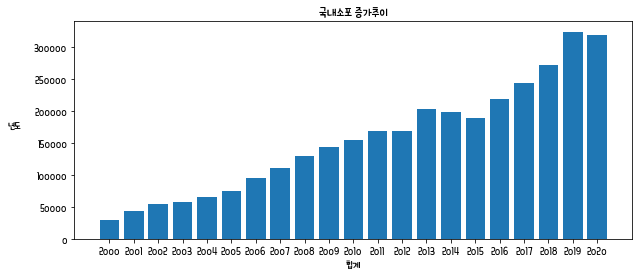

In [120]:
plt.figure(figsize = (10, 4))
plt.title('국내소포 증가추이')
plt.bar(df1['년도'], df1['합계'])
# plt.xticks(x, xlabel)
plt.xlabel('합계')
plt.ylabel('년도', rotation = 0, labelpad = 20)
plt.show()

In [121]:
for column in df1.columns:
    df1[column] = df1[column].astype(int)
df1.dtypes

년도      int32
합계      int32
보통소포    int32
등기소포    int32
dtype: object

In [122]:
df_train = df1.set_index(keys = '년도')
df_train

,합계,보통소포,등기소포
년도,,,
2000,29901,7843,22058
2001,43556,9301,34255
2002,54002,8262,45740
2003,57038,7503,49535
2004,64714,6142,58572
2005,75249,4320,70929
2006,94738,3692,91046
2007,110985,3244,107741
2008,129493,2773,126720


In [123]:
# # 출처 : https://dacon.io/codeshare/2570
# from statsmodels.tsa.arima_model import ARIMA
# import statsmodels.api as sm
# from pmdarima.arima import auto_arima

# (AR = 2, 차분 =1, MA=2) 파라미터로 ARIMA 모델을 학습한다.
# model = ARIMA(df_train.합계, order = (2,1,2))
# model_fit = model.fit(trend = 'c', full_output = True, disp = True)

# model_arima= auto_arima(df_train.합계,trace=True, error_action='ignore', start_p=1,start_q=1,max_p=3,max_q=3,suppress_warnings=True,stepwise=False,seasonal=False)
# model_arima.fit(df_train.합계)
# print(model_fit.summary())

In [124]:
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm
from pmdarima.arima import auto_arima

model_arima= auto_arima(df_train.합계,trace=True, error_action='ignore', \
                        start_p=1,start_q=1,max_p=3,max_q=3,suppress_warnings=True,stepwise=False,seasonal=False)

 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=443.603, Time=0.01 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=445.955, Time=0.02 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=445.634, Time=0.11 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=453.784, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=445.501, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=447.709, Time=0.03 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=449.560, Time=0.07 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.18 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=447.394, Time=0.02 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=449.497, Time=0.05 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=448.697, Time=0.12 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=450.706, Time=0.10 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=449.396, Time=0.03 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=451.212, Time=0.08 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=450.467, Time=0.10 sec

Best model:  ARIMA(0,1,0)(0,

In [131]:
from statsmodels.tsa.arima_model import ARIMA

model = ARIMA(df_train.합계, order = (2,1,2))
model_fit = model.fit(disp = 0)
print(model_fit.summary())

C:\Users\Bestc\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\Bestc\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. fo

                             ARIMA Model Results                              
Dep. Variable:                   D.합계   No. Observations:                   20
Model:                 ARIMA(2, 1, 2)   Log Likelihood                -218.786
Method:                       css-mle   S.D. of innovations          12788.808
Date:                Wed, 20 Oct 2021   AIC                            449.571
Time:                        16:18:07   BIC                            455.545
Sample:                             1   HQIC                           450.737
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        1.41e+04   1112.273     12.678      0.000    1.19e+04    1.63e+04
ar.L1.D.합계    -0.2218      0.243     -0.915      0.360      -0.697       0.253
ar.L2.D.합계     0.5540      0.350      1.583      0.1

C:\Users\Bestc\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:1521: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(np.diag(-inv(hess)))


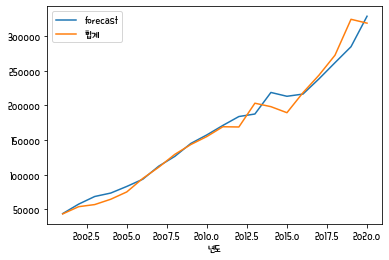

In [132]:
model_fit.plot_predict(dynamic=False)

plt.show()

C:\Users\Bestc\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\Bestc\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. fo

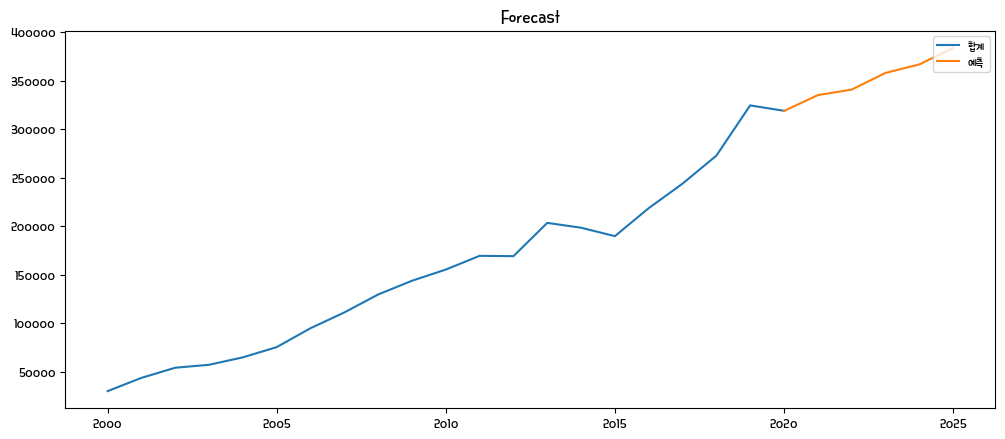

In [144]:
model = ARIMA(df_train.합계, order=(2, 1, 2))  
fitted = model.fit(disp=0)  

# Forecast
fc, se, conf = fitted.forecast(6, alpha=0.05)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc, index=[2020, 2021, 2022, 2023, 2024, 2025])

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(df_train.합계, label='합계')
plt.plot(fc_series, label='예측')
plt.title('Forecast')
plt.legend(loc='upper right', fontsize=8)
plt.show()